<a href="https://colab.research.google.com/github/ChupakhinaVV/Lab2_Robert/blob/main/2lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Установка библиотек (запускается один раз)
!pip install transformers torch scikit-learn pandas matplotlib tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# 2. Импорты
import pandas as pd
import torch
from transformers import RobertaTokenizer, RobertaModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from tqdm import tqdm
import matplotlib.pyplot as plt


In [ ]:
# 3. Загрузка и фильтрация датасета
df = pd.read_csv("data/youtube.csv")
df = df.drop_duplicates(subset=["description"])
df = df[df["description"].str.strip().astype(bool)]
df["label"] = df["description"].apply(lambda x: 1 if len(x) >= 300 else 0)

# Балансировка: по 500 примеров с коротким и длинным описанием
short_df = df[df["label"] == 0].sample(500, random_state=42)
long_df = df[df["label"] == 1].sample(500, random_state=42)
df_balanced = pd.concat([short_df, long_df]).reset_index(drop=True)


In [ ]:
# 4. Загрузка модели RoBERTa
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaModel.from_pretrained("roberta-base")
model.eval()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dr

In [ ]:
# 5. Получение эмбеддингов CLS-токена
embeddings = []
batch_size = 16

with torch.no_grad():
    for i in tqdm(range(0, len(df_balanced), batch_size)):
        texts = df_balanced["description"].iloc[i:i+batch_size].tolist()
        inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=256)
        outputs = model(**inputs)
        cls_embeddings = outputs.last_hidden_state[:, 0, :].numpy()
        embeddings.extend(cls_embeddings)

X = torch.tensor(embeddings)
y = torch.tensor(df_balanced["label"].values)


100%|██████████| 63/63 [10:41<00:00, 10.18s/it]
<ipython-input-6-d69582564dfa>:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X = torch.tensor(embeddings)


In [ ]:
# 6. Обучение модели и оценка
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["short", "long"]))


              precision    recall  f1-score   support

       short       0.83      0.83      0.83        96
        long       0.85      0.85      0.85       104

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [ ]:
# 7. Исследование эмбеддингов с разных слоёв трансформера
# В RoBERTa 12 слоёв: получим CLS из 1-го, 4-го, 8-го и последнего

from transformers import RobertaModel

model = RobertaModel.from_pretrained("roberta-base", output_hidden_states=True)
model.eval()

layer_results = {}
layers_to_check = [1, 4, 8, 11]

with torch.no_grad():
    for layer in layers_to_check:
        layer_embeddings = []
        for i in tqdm(range(0, len(df_balanced), batch_size), desc=f"Layer {layer}"):
            texts = df_balanced["description"].iloc[i:i+batch_size].tolist()
            inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=256)
            outputs = model(**inputs)
            cls = outputs.hidden_states[layer][:, 0, :].numpy()
            layer_embeddings.extend(cls)
        # Обучение
        X_layer = torch.tensor(layer_embeddings)
        X_train, X_test, y_train, y_test = train_test_split(X_layer.numpy(), y.numpy(), test_size=0.2, random_state=42)
        clf = LogisticRegression(max_iter=1000)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        layer_results[f"Layer {layer+1}"] = report["weighted avg"]["f1-score"]


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Layer 11: 100%|██████████| 63/63 [09:59<00:00,  9.52s/it]


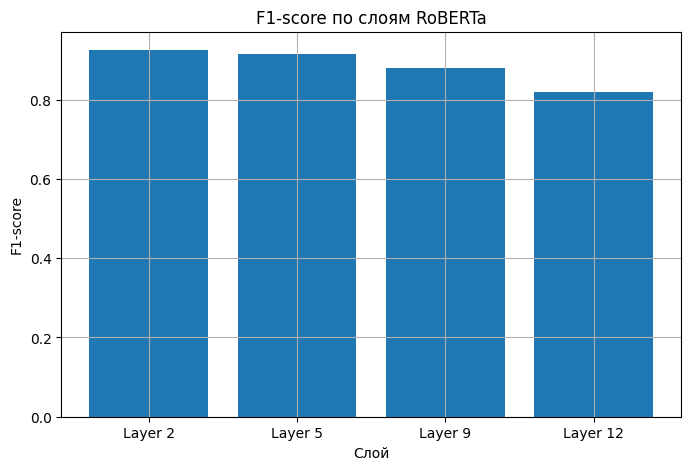

In [ ]:
# 8. Визуализация результатов
plt.figure(figsize=(8, 5))
plt.bar(layer_results.keys(), layer_results.values())
plt.title("F1-score по слоям RoBERTa")
plt.ylabel("F1-score")
plt.xlabel("Слой")
plt.grid(True)
plt.show()
